[![OcularAI](https://avatars.githubusercontent.com/u/157649066?s=200&v=4)](https://www.useocular.com/)

# How to Train YOLOv11 Object Detection Vision Models on Custom Datasets

### Aim : Compare prediction between out of the box YOLO11 model and fine tuned YOLO11 model on custom labeled data from Ocular
---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/OcularEngineering/notebooks)

## YOLO11: Advancements and Performance Overview

###Introduction

YOLO11 builds upon the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

###Efficiency and Accuracy

YOLO11m achieves a higher mean Average Precision (mAP) score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

###Model Variants

YOLOv11 is available in five different sizes, ranging from 2.6M to 56.9M parameters, and capable of achieving from 39.5 to 54.7 mAP on the COCO dataset.

| Model   | Parameters (M) | mAP (%) |
|---------|----------------|---------|
| YOLO11n | 2.6            | 39.5    |
| YOLO11s | 9.4            | 47.0    |
| YOLO11m | 20.1           | 51.5    |
| YOLO11l | 25.3           | 53.4    |
| YOLO11x | 56.9           | 54.7    |



#  Step 1 : Configure API key and Dataset Export Snippet

1. Configure your OCULAR_API_KEY from `workspace setting/developer setting`

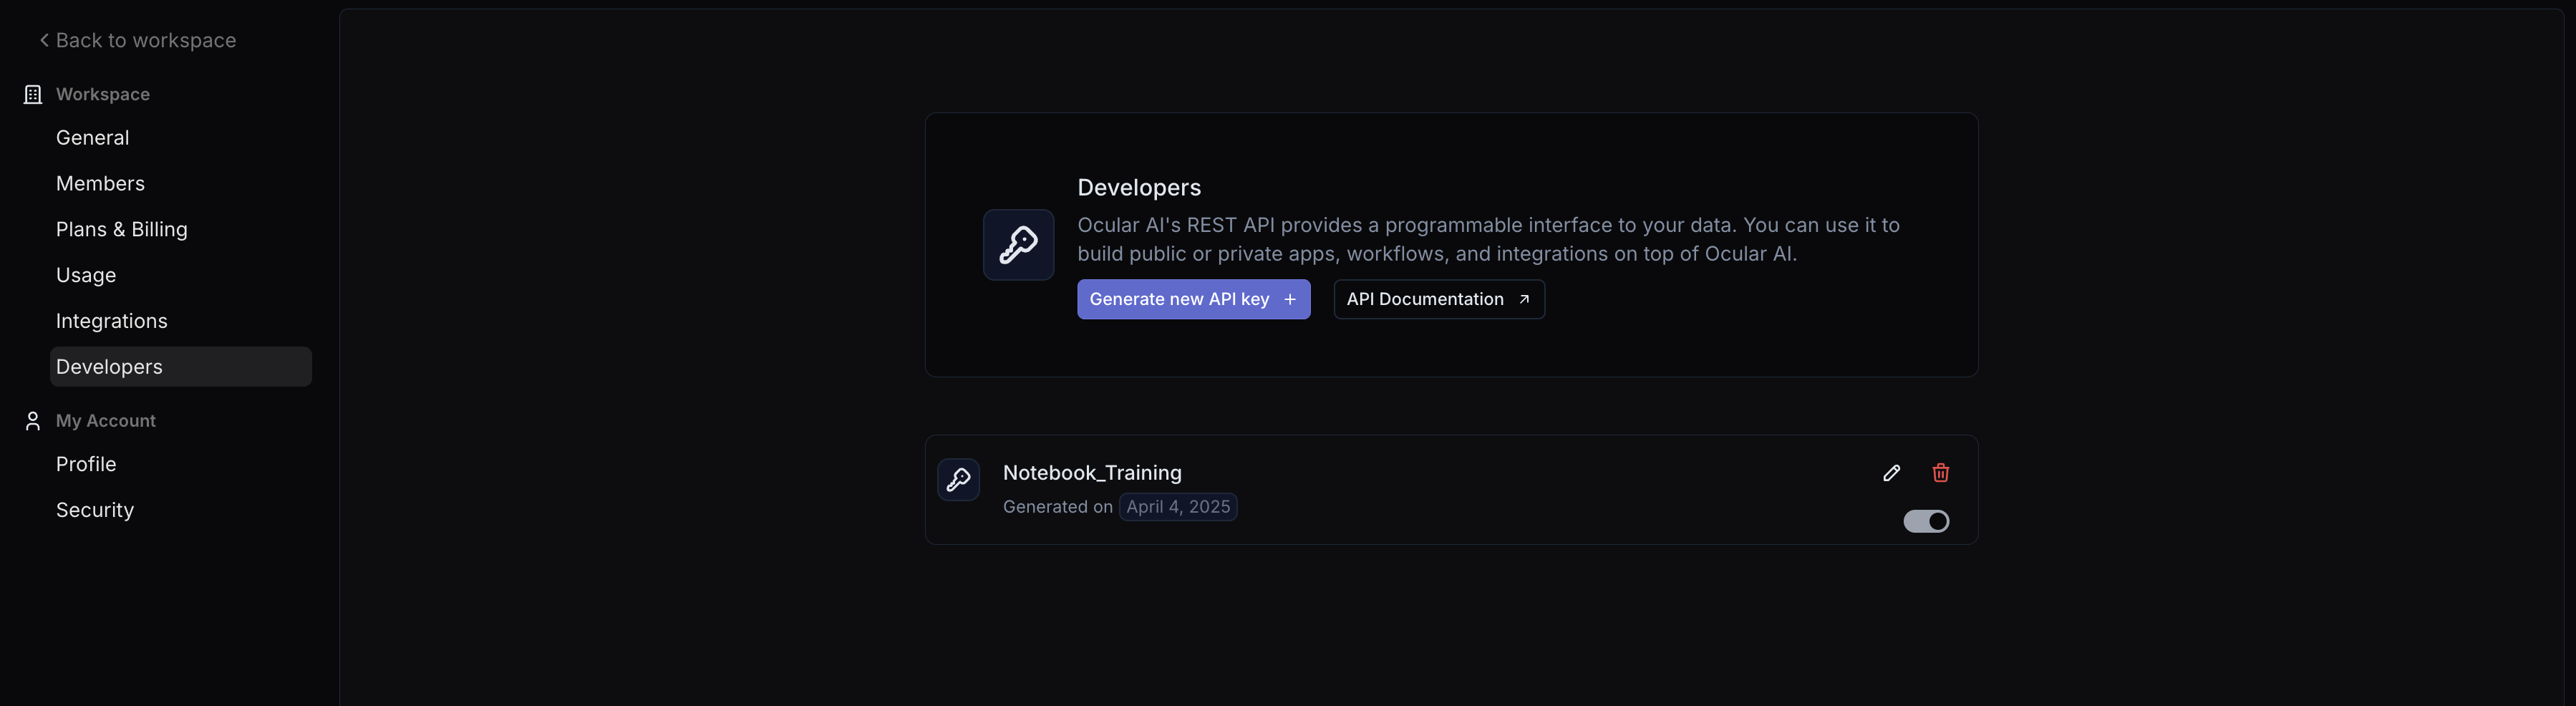

# Step 2 :  Set the runtime to GPU

- To ensure we have access to GPU. Run `nvidia-smi` command , if faced any error follow the steps to set the runtime to GPU.

### Steps to set GPU runtime

1. Navigate to the menu and select `Edit` > `Notebook settings`.
2. In the settings window, locate the `Hardware accelerator` option.
3. Set it to `T4 GPU`.
4. Click `Save` to apply the changes.

In [2]:
!nvidia-smi

Fri Apr  4 16:49:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Step 3 : Install YOLO11 via Ultralytics

In this part we install the required libraies

In [3]:
# Download the required libraries

%pip install "ultralytics<=8.3.40" supervision

import ultralytics

ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 41.0/235.7 GB disk)


**Note** : In this step we configure `{HOME_DIRECTORY}` which will be used in later part.

In [4]:
import os
HOME_DIRECTORY = os.getcwd()

print("Home Directory Path : ",HOME_DIRECTORY)

Home Directory Path :  /content


# Step 4 : Inference Out Of The Box Pretrained YOLO11 Model

**NOTE:** The out of the box model is trained on a generic dataset so its perfomance on this custom image will be poor. For example below it fails to predict the houses in the image.


In [5]:
# Download image from G-drive
!gdown 13H1MKjKE7NCnp2G7AwqFCv5VjBQ-yLPp -O mkoba_houses.png

# Run the YOLO model for the downloaded image
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='mkoba_houses.png' save=True

Downloading...
From: https://drive.google.com/uc?id=13H1MKjKE7NCnp2G7AwqFCv5VjBQ-yLPp
To: /content/mkoba_houses.png
100% 5.82M/5.82M [00:00<00:00, 262MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/mkoba_houses.png: 384x640 (no detections), 44.0ms
Speed: 3.3ms preprocess, 44.0ms inference, 24.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Result annotated image is saved in `{HOME_DIRECTORY}/runs/detect/predict/`.

## The predicted result for out of the box YOLO model

**Note** -: These are the results before finetuning the YOLO model

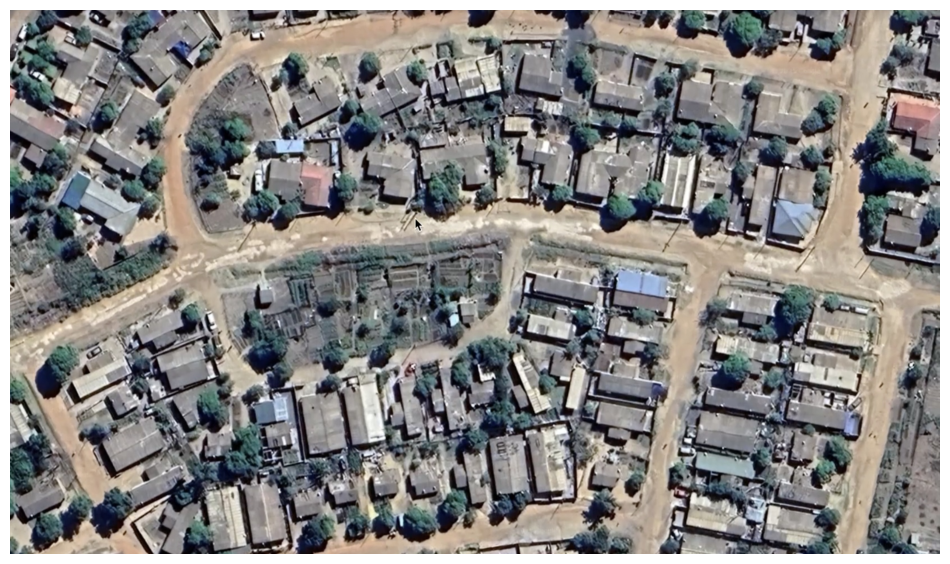

In [9]:
import cv2
import supervision as sv

image = cv2.imread("runs/detect/predict/mkoba_houses.jpg")
sv.plot_image(image=image)

**Note** -: Create datasets directory to manage and store our downloaded dataset exports

In [12]:
# Create and navigate to datasets folder

!mkdir {HOME_DIRECTORY}/datasets
%cd {HOME_DIRECTORY}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


# Step 5 : Fine-tune YOLO11 on custom dataset export using Ocular SDK

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`.

In [13]:
%pip install ocular-ai

from google.colab import userdata
from ocular import Ocular

OCULAR_API_KEY = userdata.get('OCULAR_API_KEY')

# Access the export from ocular and download it

ocu = Ocular(api_key=OCULAR_API_KEY)
project = ocu.workspace("712368e2-af67-4de6-bc35-5367793f9b09").project("41fa3ff1-811c-4c67-82a5-f82bc376e284")
version = project.version("6ddcfbd0-84e3-4304-b5af-7d5b43a3f620")
export = version.export("122fc4fe-45f1-4427-bd4a-bfae0f8bc2c1")
dataset = export.download()

2025-04-04 17:00:27,961 - ocular - INFO - Accessing workspace: 712368e2-af67-4de6-bc35-5367793f9b09
2025-04-04 17:00:29,907 - ocular - INFO - Retrieving project 41fa3ff1-811c-4c67-82a5-f82bc376e284 from workspace 712368e2-af67-4de6-bc35-5367793f9b09
2025-04-04 17:00:38,632 - ocular - INFO - Downloading export 122fc4fe-45f1-4427-bd4a-bfae0f8bc2c1
Downloading: 12.0 MB downloaded (3.2 MB/s)
2025-04-04 17:00:46,166 - ocular - INFO - Downloaded export to /content/datasets/export_122fc4fe-45f1-4427-bd4a-bfae0f8bc2c1.zip


# Step 6 : Extract the Zip folder
The downloaded file is a zip folder in next step we extract it in datasets folder `{HOME_DIRECTORY}/datasets/*`

In [14]:
# Unzip the export downloaded in the dataset folder

import zipfile
import os

zip_path = dataset
extract_folder_name = os.path.splitext(os.path.basename(zip_path))[0]
extract_to = os.path.join(os.path.dirname(zip_path), extract_folder_name)

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Step 7 : Training of Model on custom labeled dataset from **Ocular**

In this step we fine tune our YOLO11 model on the dataset export we downloaded and  store the results in `{HOME_DIRECTORY}/runs/detect/train/`

In [19]:
%cd {HOME_DIRECTORY}

# The exported dataset path
dataset_path=f"{HOME_DIRECTORY}/datasets/{extract_folder_name}"

# Trian the Model
!yolo task=detect mode=train model=yolo11s.pt data={dataset_path}/data.yaml epochs=50 imgsz=640 plots=True

/content
New https://pypi.org/project/ultralytics/8.3.101 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/export_122fc4fe-45f1-4427-bd4a-bfae0f8bc2c1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

# Step 8 : **Analytics** : Model Training

Below are the results of the model training , lets observe some of the such as confusion_matrix , results , val_batch0_pred


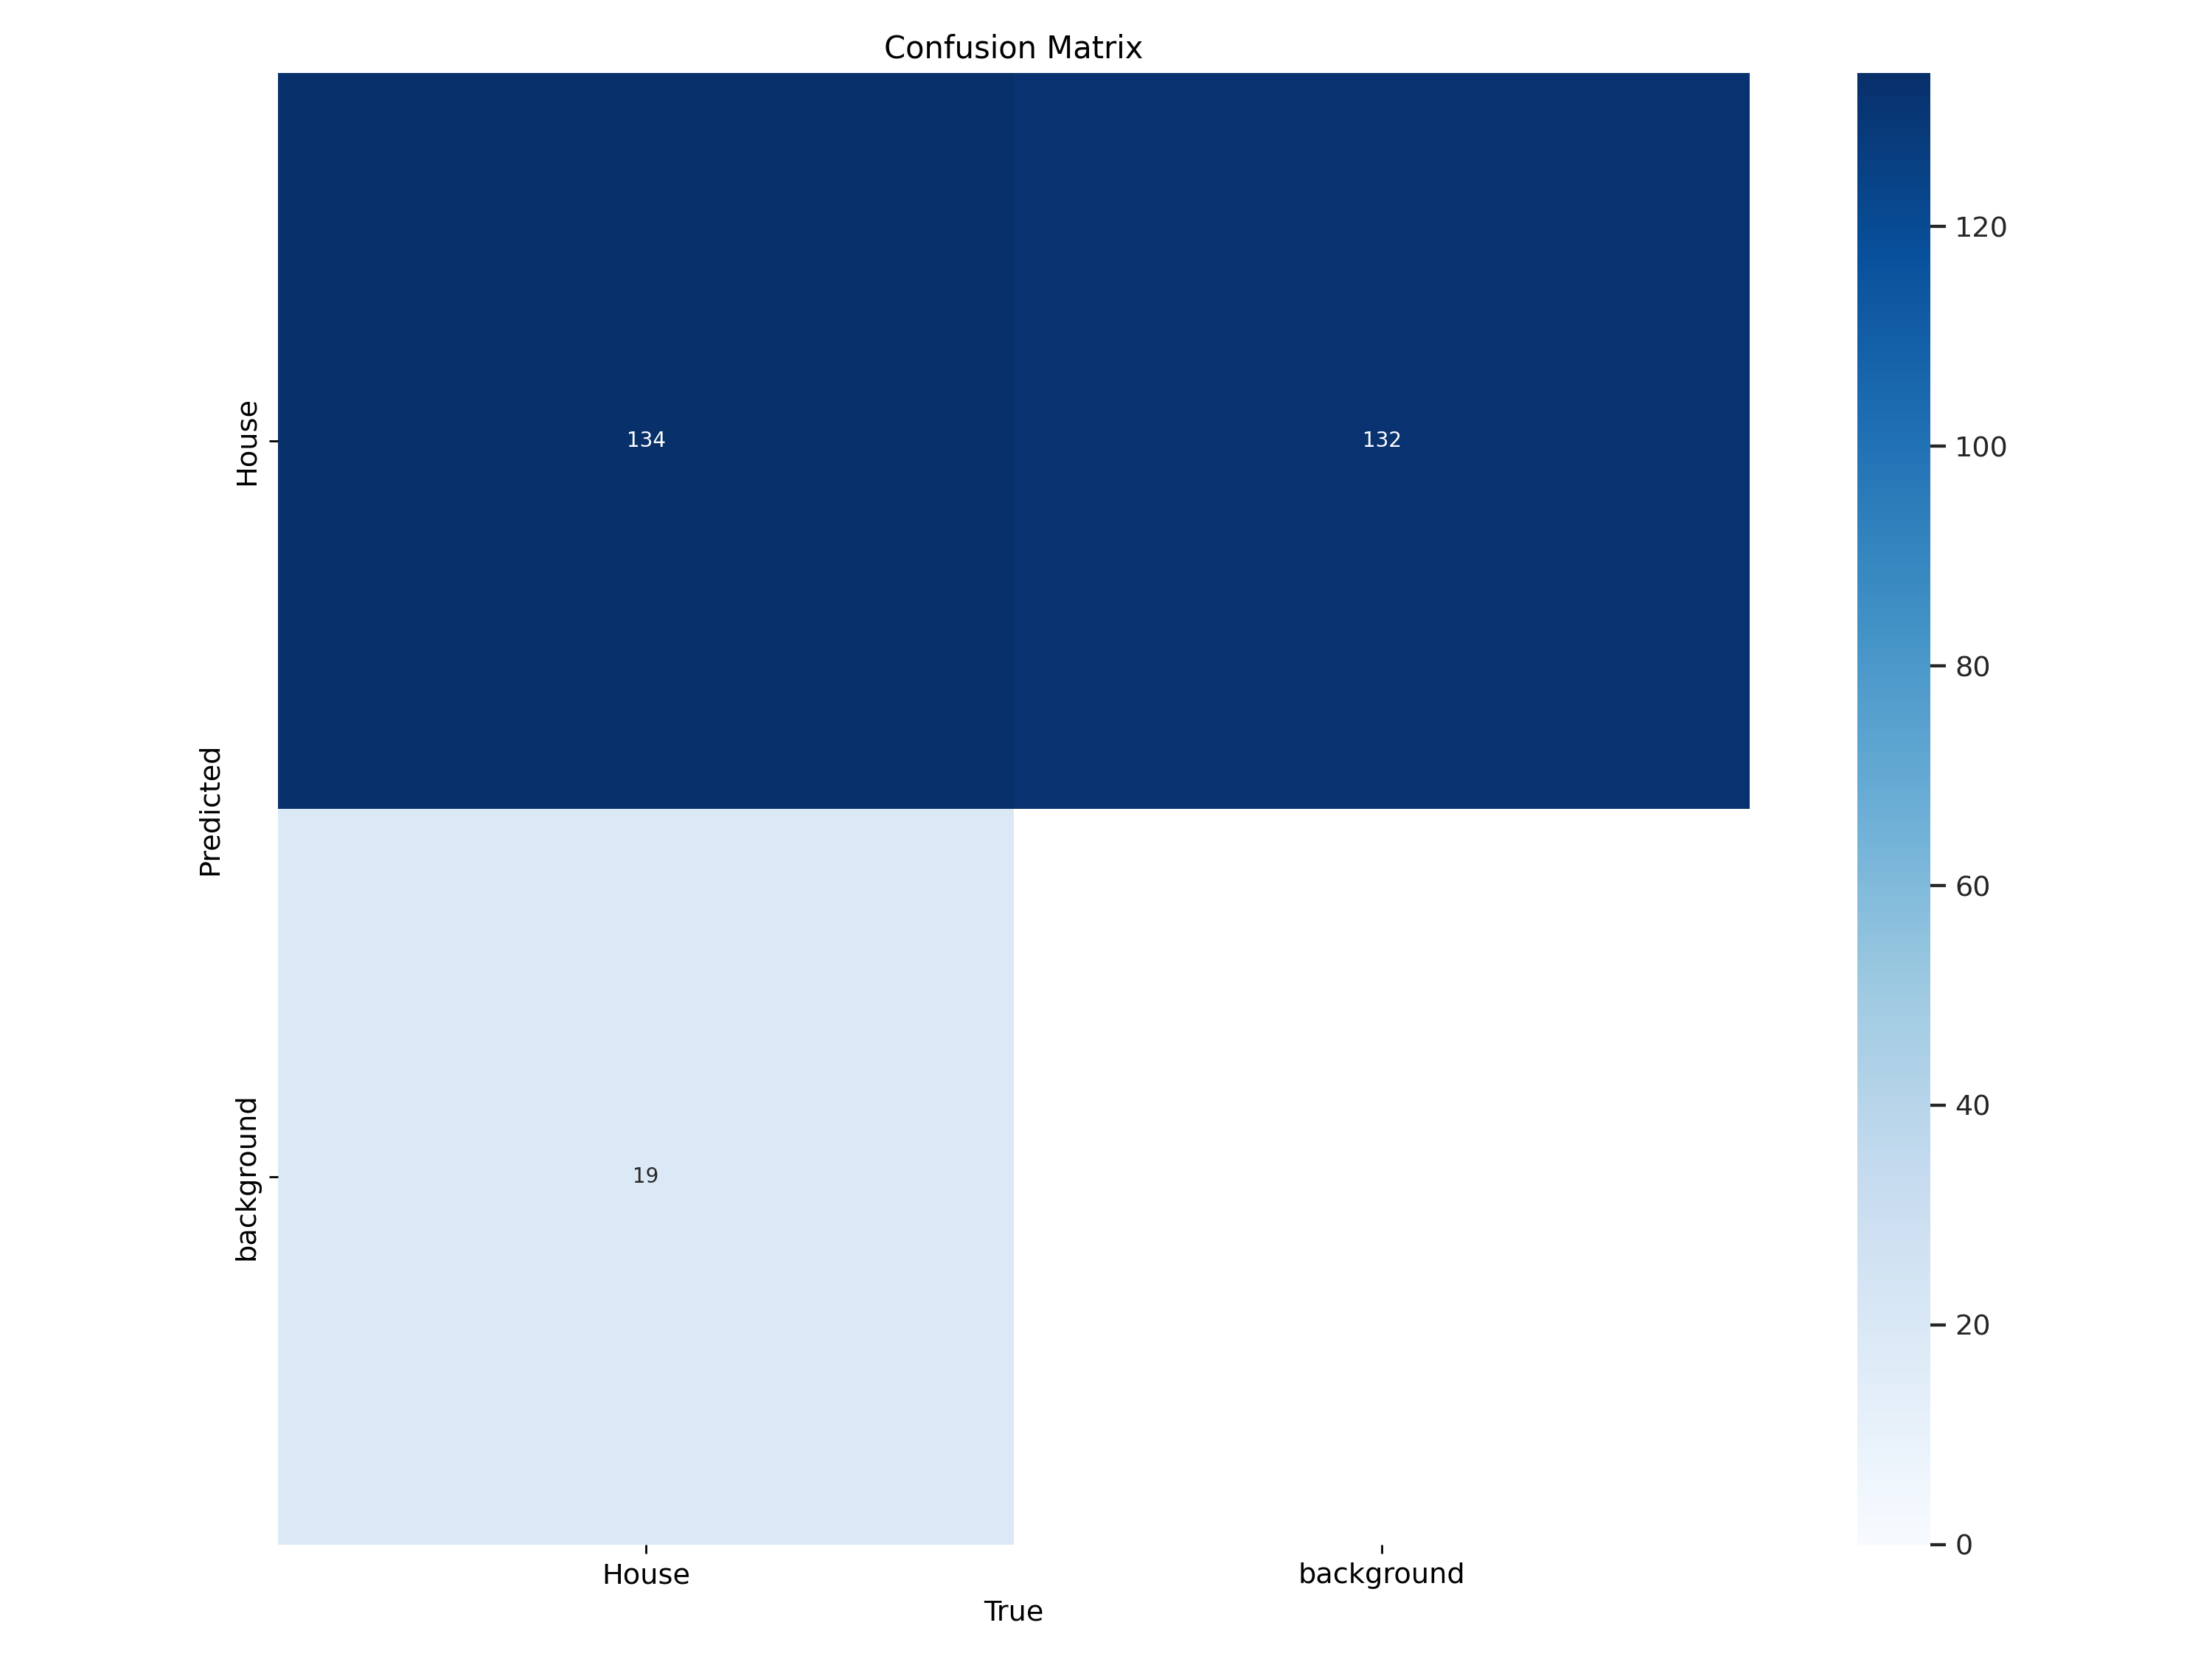

In [20]:
# Let's examine the confusion_matrix and other results

from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME_DIRECTORY}/runs/detect/train/confusion_matrix.png', width=600)

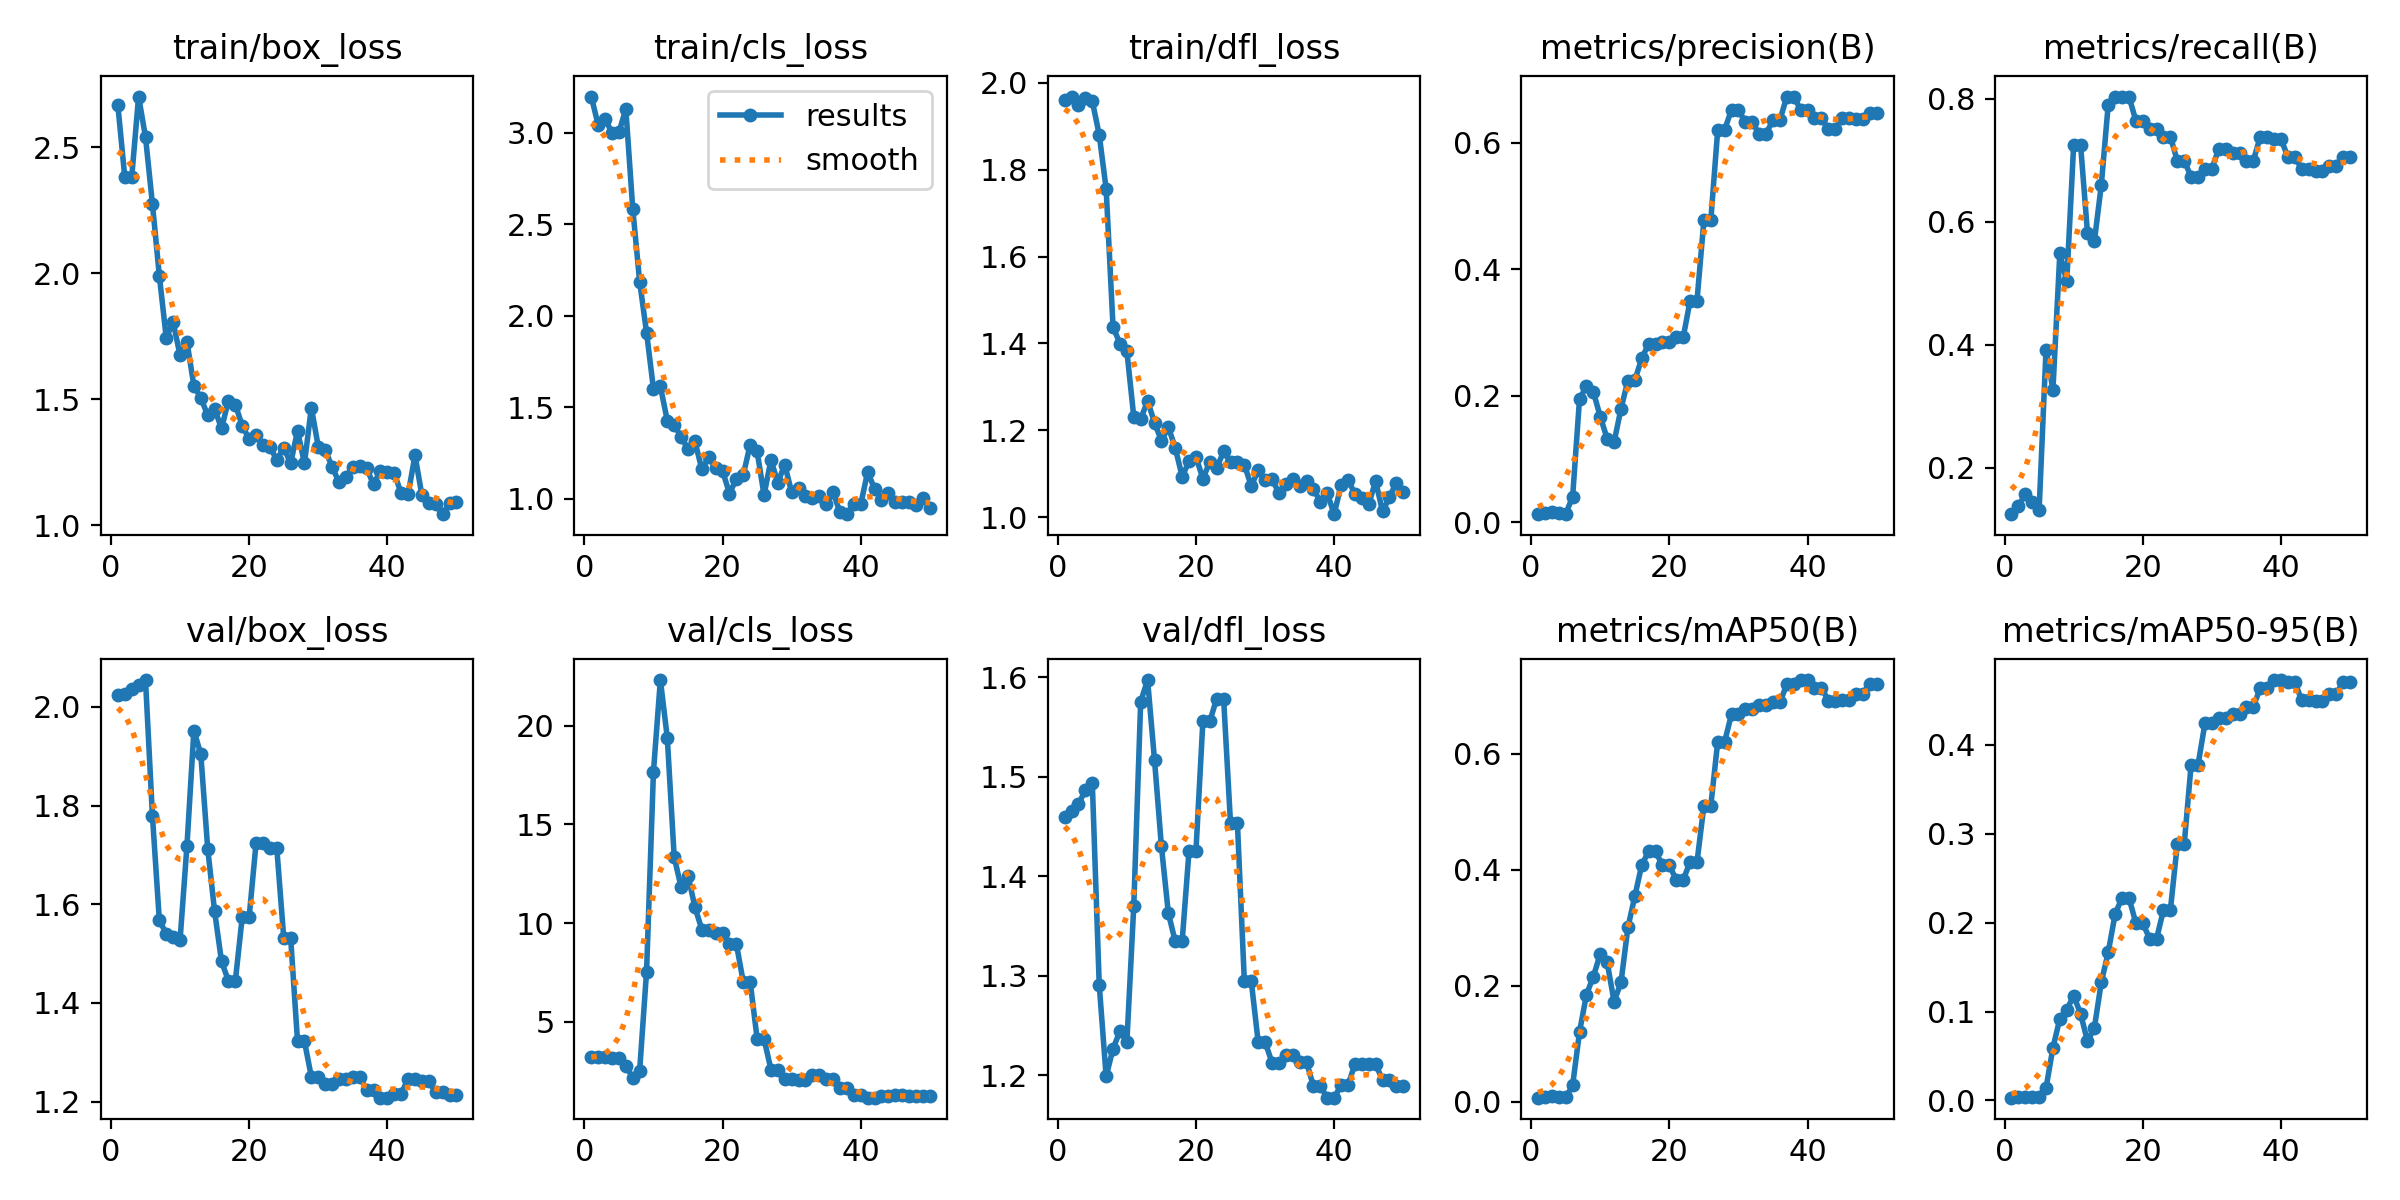

In [21]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME_DIRECTORY}/runs/detect/train/results.png', width=600)

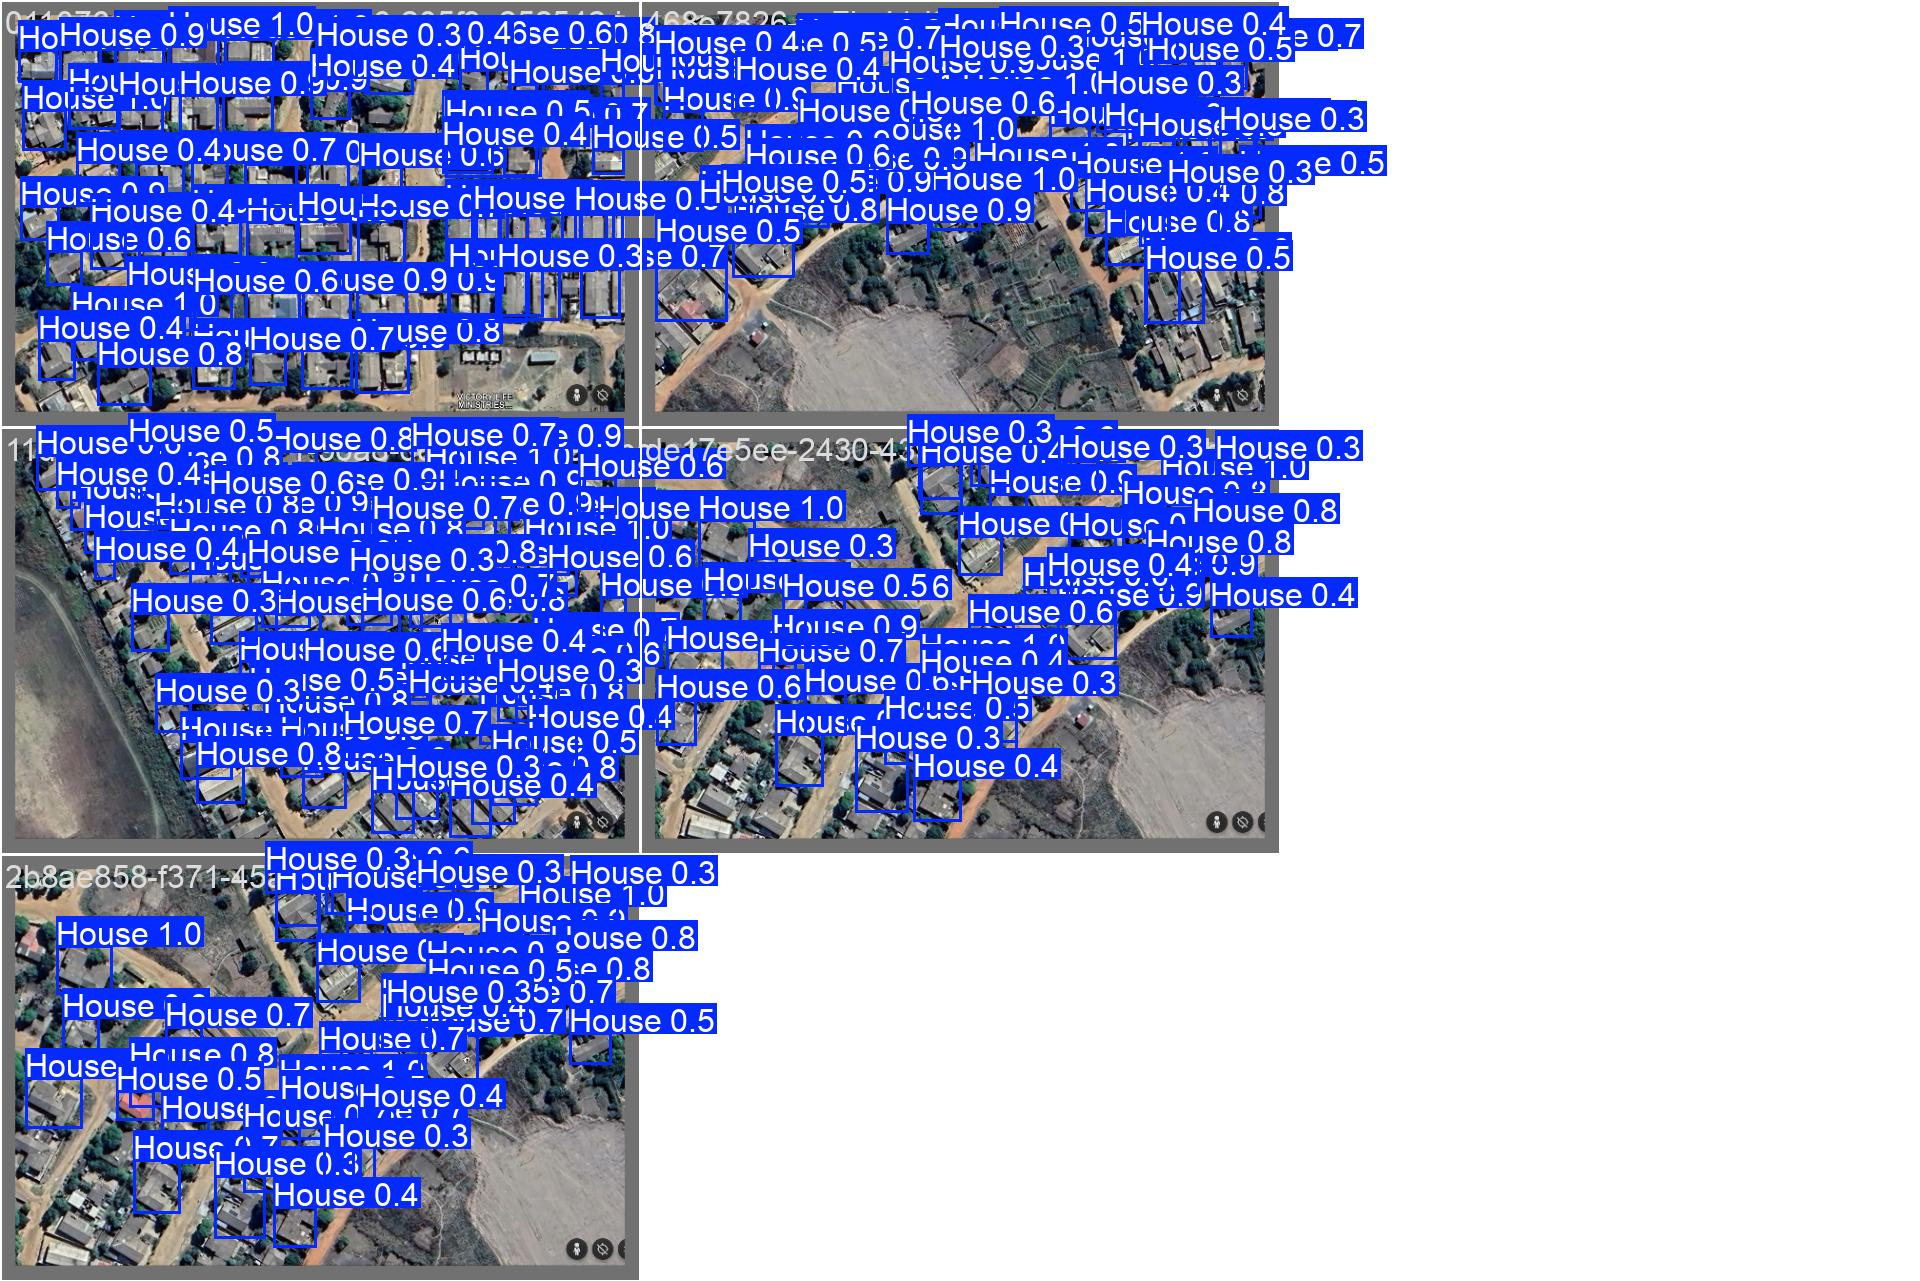

In [22]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME_DIRECTORY}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Step 9 : Validation : Fine tuned Model

In this step we validate our fine tuned model on the valid images in datasets



In [23]:
# Validating the model using the new weights from train

!yolo task=detect mode=val model={HOME_DIRECTORY}/runs/detect/train/weights/best.pt data={dataset_path}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/export_122fc4fe-45f1-4427-bd4a-bfae0f8bc2c1/valid/labels.cache... 6 images, 0 backgrounds, 1 corrupt: 100% 6/6 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/export_122fc4fe-45f1-4427-bd4a-bfae0f8bc2c1/valid/images/34896db0-5b1e-4199-abfc-adaa52f842cd.jpg: ignoring corrupt image/label: negative label values [  -0.041457   -0.051342   -0.041457   -0.076235   -0.060669    -0.11046   -0.023256   -0.056009   -0.021234   -0.052898]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.62it/s]
                   all          5        153      0.652      0.733      0.728       0.47
Speed: 0.2ms preprocess, 14.9ms inference, 0.0ms loss, 34.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralyt

# Step 10 : Download Video : Google Drive

In this step we download the video that needs prediction from Google drive and store in root folder

In [24]:
!wget "https://drive.google.com/uc?export=download&id=1N8aZQe5XnlyKT7_RttujnO_yGlFdBUke" -O mkoba_houses.mp4

--2025-04-04 17:12:38--  https://drive.google.com/uc?export=download&id=1N8aZQe5XnlyKT7_RttujnO_yGlFdBUke
Resolving drive.google.com (drive.google.com)... 74.125.130.113, 74.125.130.101, 74.125.130.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.130.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1N8aZQe5XnlyKT7_RttujnO_yGlFdBUke&export=download [following]
--2025-04-04 17:12:38--  https://drive.usercontent.google.com/download?id=1N8aZQe5XnlyKT7_RttujnO_yGlFdBUke&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.118.132, 2404:6800:4003:c05::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.118.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95174874 (91M) [video/mp4]
Saving to: ‘mkoba_houses.mp4’

mkoba_houses.mp4    100%[===================>]  90.77M  42.5MB/s    in 2.1s

# Step 11 : Inference : Custom model
Now we inference using the fine tuned trained model on a video we downloaded earlier and test it out on one of the frames

YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
VideoInfo(width=2268, height=1474, fps=60, total_frames=3290)

0: 384x640 72 Houses, 48.5ms
Speed: 4.1ms preprocess, 48.5ms inference, 152.6ms postprocess per image at shape (1, 3, 384, 640)


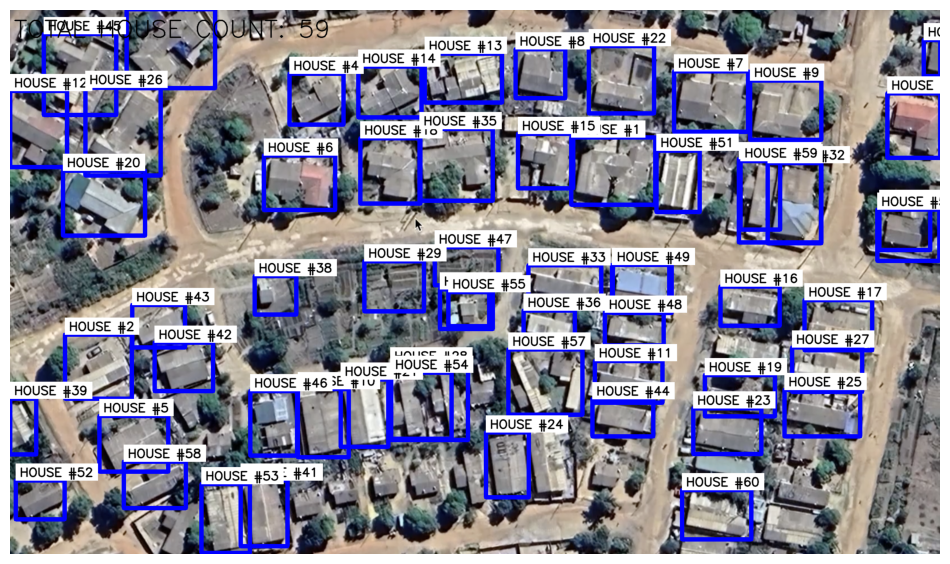

In [25]:
# Use SAHI For Detection
from ultralytics import YOLO
import supervision as sv
import numpy as np

trained_model = YOLO(f"{HOME_DIRECTORY}/runs/detect/train/weights/best.pt")
trained_model.fuse()

def predict(x: np.ndarray) -> sv.Detections:
    result = trained_model(x)[0]
    return sv.Detections.from_ultralytics(result)

tracker = sv.ByteTrack()

VIDEO_PATH="mkoba_houses.mp4"
video_info = sv.VideoInfo.from_video_path(video_path=VIDEO_PATH)
tracker = sv.ByteTrack(
    lost_track_buffer=60,
    frame_rate=video_info.fps,
)
print(video_info)
box_annotator = sv.BoxAnnotator(
    thickness=10,
    color=sv.Color.BLUE,
)
label_annotator = sv.LabelAnnotator(
    color=sv.Color.WHITE,
    text_scale=1,
    text_color=sv.Color.BLACK,
    text_thickness=2
)

zone = sv.PolygonZone(
          polygon=np.array([[8, 5], [15, 1464], [2236, 1451], [2239, 5], [5, 11]])
      )

zone_annotator = sv.PolygonZoneAnnotator(
        zone=zone,
        color=sv.Color.BLUE,
        thickness=4,
    )



def process_frame(frame):
    detections = predict(frame)
    detections = tracker.update_with_detections(detections)
    labels = [f"HOUSE #{tracker_id}" for tracker_id in detections.tracker_id]
    detections.with_nms()
    annotated_frame = frame.copy()

    annotated_frame = box_annotator.annotate(
        scene=annotated_frame,
        detections=detections
    )
    annotated_image = label_annotator.annotate(
    scene=annotated_frame, detections=detections,labels=labels)

    zone_presence = zone.trigger(detections)
    zone_present_idxs = [idx for idx, present in enumerate(zone_presence) if present]
    zone_present = detections[zone_present_idxs]
    annotated_frame = cv2.putText(annotated_frame, f'TOTAL HOUSE COUNT: {zone_annotator.zone.current_count}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 2, cv2.LINE_AA)

    return annotated_frame

# Try Single Frame
image = cv2.imread("mkoba_houses.png")
annotated_image = process_frame(frame=image)
sv.plot_image(annotated_image)



# Step 12 : Prediction : Video

In this step we do the prediction on the downloaded video and store the result in `{HOME_DIRECTORY}/"mkobahouse_annotated.mp4"`

In [26]:
%cd {HOME_DIRECTORY}

VIDEO_PATH="mkoba_houses.mp4"
OUT_VIDEO_PATH="mkobahouse_annotated.mp4"

video_info = sv.VideoInfo.from_video_path(video_path=VIDEO_PATH)
frames_generator = sv.get_video_frames_generator(source_path=VIDEO_PATH)

with sv.VideoSink(target_path=OUT_VIDEO_PATH, video_info=video_info) as sink:
  for i, frame in enumerate(frames_generator):
    print(f"Processing frame {i}")
    annotated_frame = process_frame(frame)
    sink.write_frame(frame=annotated_frame)

Streaming output truncated to the last 5000 lines.
Processing frame 2040

0: 416x640 41 Houses, 12.0ms
Speed: 3.1ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Processing frame 2041

0: 416x640 41 Houses, 12.0ms
Speed: 3.2ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Processing frame 2042

0: 416x640 41 Houses, 11.9ms
Speed: 3.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Processing frame 2043

0: 416x640 42 Houses, 12.0ms
Speed: 3.0ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Processing frame 2044

0: 416x640 39 Houses, 12.0ms
Speed: 3.1ms preprocess, 12.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Processing frame 2045

0: 416x640 39 Houses, 12.0ms
Speed: 2.9ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
Processing frame 2046

0: 416x640 39 Houses, 11.9ms
Spe

# Step 13 : Comparison : Out of the box vs Fine tuned Model

We are comparing the prediction for out of the box YOLO11 model with fine tuned YOLO11 model on custom labeled dataset from **Ocular Foundry**

**Image-1** : The first image is prediction done by out of the box YOLO11 model

**Image-2** : The second image is prediction done by the fine tuned YOLO11 model using labeled dataset from **Ocular**

These are the results before fine tuning


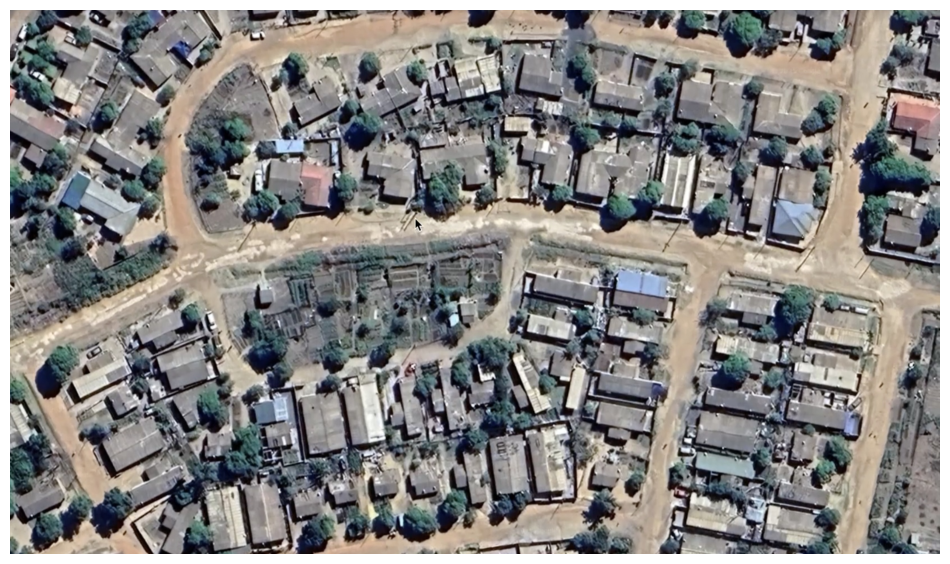





These are the results after fine tuning the model
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/mkoba_houses.png: 384x640 72 Houses, 47.8ms
Speed: 3.5ms preprocess, 47.8ms inference, 167.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


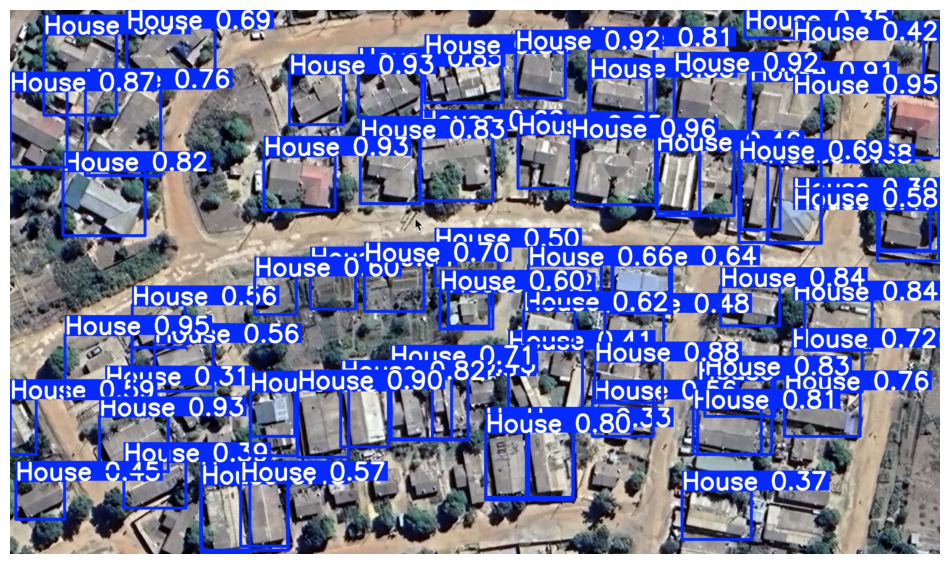

In [30]:
import cv2
import supervision as sv

print("These are the results before fine tuning")

image = cv2.imread("runs/detect/predict/mkoba_houses.jpg")
sv.plot_image(image=image)

print("\n")
print("\n")

print("These are the results after fine tuning the model")

!yolo task=detect mode=predict model={HOME_DIRECTORY}/runs/detect/train/weights/best.pt conf=0.25 source='mkoba_houses.png' save=True
image = cv2.imread("runs/detect/predict2/mkoba_houses.jpg")
sv.plot_image(image=image)

## 🏆 Voila
  we succesfully fine tuned the YOLO11 model on a custom dataset and compared the before and after results

### Resources
